<a href="https://colab.research.google.com/gist/sudip-mondal-2002/95bcf585521dfb180f5fc52494d3e2d0/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


## Data collected from [here](https://www.kaggle.com/c/digit-recognizer)

In [2]:
path = "/drive/MyDrive/ML-Datasets/Digit_recognition/train.csv"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(path)
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [6]:
x = x.reshape((-1,28,28,1))/255

In [7]:
print(x.shape, y.shape)

(42000, 28, 28, 1) (42000,)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Normalization

cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
cnn.add(Normalization())
cnn.add(MaxPool2D())
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
cnn.add(MaxPool2D())
cnn.add(Flatten())
cnn.add(Dense(units=500, activation="relu"))
cnn.add(Dense(units=10, activation="softmax"))
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
normalization (Normalization (None, 26, 26, 64)        129       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               8

In [9]:
history = cnn.fit(x,y,batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
1050/1050 [==============================] - 12s 10ms/step - loss: 0.1451 - accuracy: 0.9561 - val_loss: 0.0604 - val_accuracy: 0.9824
Epoch 2/30
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0456 - accuracy: 0.9849 - val_loss: 0.0516 - val_accuracy: 0.9831
Epoch 3/30
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0393 - val_accuracy: 0.9882
Epoch 4/30
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0444 - val_accuracy: 0.9890
Epoch 5/30
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0394 - val_accuracy: 0.9905
Epoch 6/30
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0445 - val_accuracy: 0.9899
Epoch 7/30
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0471 -

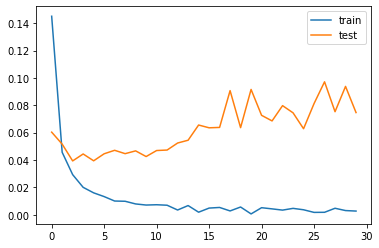

In [10]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train","test"])
plt.show()

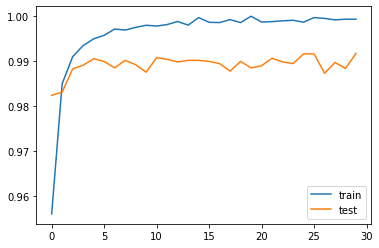

In [11]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train","test"])
plt.show()

In [12]:
test_path = "/drive/MyDrive/ML-Datasets/Digit_recognition/test.csv"
test = pd.read_csv(test_path)
X_test = (test.iloc[:, :].values).reshape(-1,28,28,1)/255

In [13]:
res = cnn.predict(X_test)

In [14]:
pred = []
index = 1
for i in res:
  max = 0
  pos = 0
  for j in range(10):
    if (i[j]>max):
      max = i[j]
      pos = j
  pred.append([index, pos])
  index+=1
pred = pd.DataFrame(pred)
pred.head()

,0,1
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [15]:
pred.to_csv("result.csv", index=False, header= ["ImageID", "Label"])